# The Bisection Method (二分法)

对于区间 $[a，b]$ 上**连续不断**且 $f(a) \cdot f(b)<0$ 的函数 $y=f(x)$，通过不断地把函数$f(x)$ 的零点所在的区间一分为二，使区间的两个端点逐步逼近零点，进而得到零点近似值的方法叫二分法。

## 示例：Python 二分法求一元方程

二分法求 $x^{3}-2 x-5=0$ 在 $[2，3]$ 之间的根

In [1]:
def SqrtBisection(equation, a, b, N, tol=1e-3):
    """Finding the Roots of a Univariate Equation by The Bisection Method 
    
    Args:
        equation: the equation that need to find the root
        a: endpoints a
        b: endpoints b 
        N: maximum number of iterations
        tol: tolerance
        
    Returns:
        i: iterations i
        res: approximate solution p
    
    """
    i = 0
    res=None

    while i < N:
        i += 1
        
        p = a + (b-a)/2
        FP = equation(p)
        if FP==0 or (b-a)/2 < tol:
            res = p
            break
  
        FA = equation(a)
        if FA*FP > 0:
            a = p
        else:
            b = p
    return i, res

In [2]:
# 定义方程
def examplef(x):
    f= pow(x,3) - 2*x - 5
    return f

In [3]:
iteration, re = SqrtBisection(examplef, 2, 3, 100)
if not re is None:
    print("After %d iterations, the root is %s" % (iteration, re))
else:
    print("After %d iterations, method failed" % iteration)

After 10 iterations, the root is 2.0947265625


### 验证

In [4]:
fre = examplef(re)
print(fre)

0.00195434782654047


Text(0.5, 1.0, 'Bisection Method')

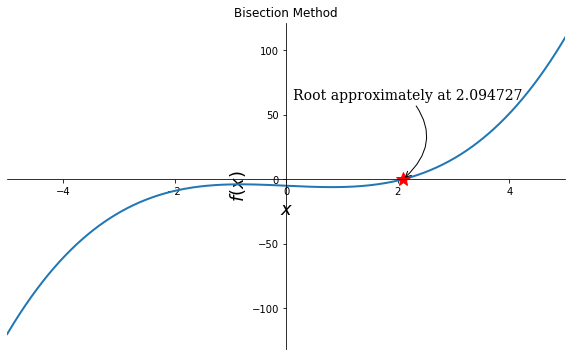

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-5, 5, 1000)
y = examplef(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, linewidth=2)
#截取x的某一部分
plt.xlim((-5,5))

ax = plt.gca() # 获取当前轴
# 去掉轴上边和右边
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
# 移动下边和左边
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

# 把 root 画出来
ax.plot(re, examplef(re), 'r*', markersize=14)
# root 点做一个注释
ax.annotate("Root approximately at %f" % re,
    fontsize=14, family="serif",
    xy=(re, fre), xycoords='data',
    xytext=(-110, 80), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)
ax.set_title("Bisection Method")